# Proyecto: Péndulo Doble

##### Fecha de Entrega: Lunes, 1 de Febrero de 2021. #####

#### Altamira López Emilio #### 
GitHub: EmilioAltamira

#### Islas Villamar Fernando Jesús####
GitHub: VillamarFer

#### Ortega Alva Karla Ruth####
GitHub: KarlaOrtegaA

### Descipción ###

Se define al péndulo doble como un sistema físico dinámico que consiste en un péndulo simple suspendido del extremo de otro péndulo simple, que oscila en un plano vertical bajo la acción de la gravedad .

Pertenece a los llamados, sistemas caóticos, esto significa que pequeñas variaciones en las condiciones iniciales cambian por completo el comportamiento del sistema a lo largo del tiempo, por lo que no se pueden aproximar sus resultados, para enfrentar dicho problema, se recurre a un sistema de ecuaciones diferenciales.

<img src=http://2.bp.blogspot.com/-s-eN37hv4XA/VKVX1_OO3uI/AAAAAAAAAXc/LlNs8I7xiI8/s1600/pendulum.png>

In [55]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [31]:
#Se definen Valores constantes
L1 = 1
L2 = 1
m1 = 1
m2 = 1
g = 9.8

def DoblePendulo(y, t, L1, L2, m1, m2):
    """Arroja la primera derivada de y = theta1, a1 (aceleración) , theta2, a2 (aceleración) ."""
    theta1, a1, theta2, a2 = y

    c = np.cos(theta1-theta2)
    s = np.sin(theta1-theta2)
    M = m1 + m2
    A = g*np.sin(theta2)
    B = g*np.sin(theta1)
    
    
    theta1dot = a1
    a1dot = (m2*A*c - m2*s*(L1*a1**2*c + L2*a2**2) - (M)*B) / L1 / (m1 + m2*s**2)
    theta2dot = a2
    a2dot = ((M)*(L1*a1**2*s - A + B*c) + m2*L2*a2**2*s*c) / L2 / (m1 + m2*s**2)
    
    return np.array([theta1dot, a1dot, theta2dot, a2dot])

In [32]:
#Marca de tiempo
tmax, deltat = 30, 0.01
t = np.linspace(0, 10*np.pi, 1001)

#Angulos iniciales (Theta 1, Derivada Theta 1, Theta 2, Derivada Theta 2)
y0 = np.array([np.pi/2, np.pi, 3*np.pi/2, 0])

#Resolución de la Ecuación del Péndulo 1
P1 = odeint(DoblePendulo, y0, t, args=(L1, L2, m1, m2))

#Tomar los valores de Theta y Ptehta
theta1 = P1[:,0]

theta2 = P1[:,2]

Ptheta1 = P1[:,1]

Ptheta2 = P1[:,3]

In [33]:
#Conversión de Coordenadas polares a coordenadas cartesianas.
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

Text(0.5, 1.0, 'Trayectoria de los péndulos')

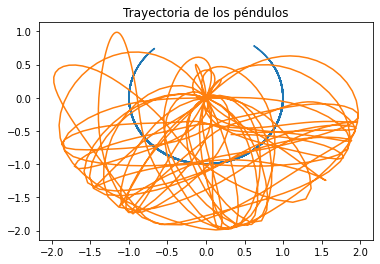

In [43]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title("Trayectoria de los péndulos")

Text(0.5, 1.0, 'Gráfica de Ptheta1 respecto a Ptheta2')

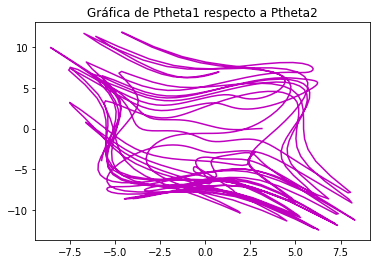

In [40]:
plt.plot(Ptheta1, Ptheta2, color = 'm')
plt.title("Gráfica de Ptheta1 respecto a Ptheta2")

Text(0.5, 1.0, 'Gráfica de Ptheta1 respecto a Theta 1')

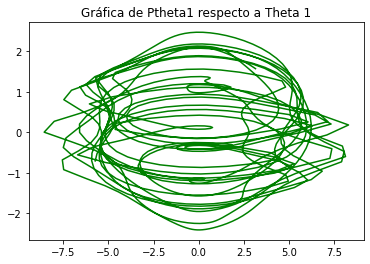

In [44]:
plt.plot(Ptheta1,theta1, color = 'g')
plt.title("Gráfica de Ptheta1 respecto a Theta 1")

Text(0.5, 1.0, 'Gráfica de Ptheta2 respecto a Theta 2')

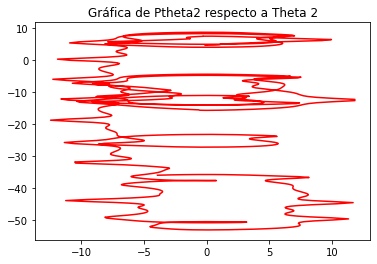

In [47]:
plt.plot(Ptheta2,theta2, color = 'r')
plt.title("Gráfica de Ptheta2 respecto a Theta 2")

Text(0.5, 1.0, 'Gráfica de Theta 1, Theta 2, PTheta 1, PTheta 2')

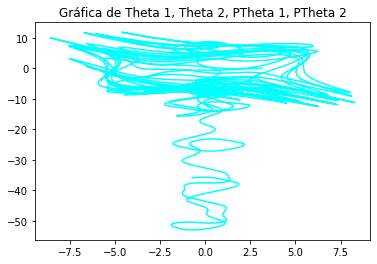

In [53]:
plt.plot(Ptheta1, Ptheta2, theta1, theta2, color = 'cyan')
plt.title("Gráfica de Theta 1, Theta 2, PTheta 1, PTheta 2")